<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/Lab2_Alexander_Del_Risco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Exploratory Data Analysis - Examining Distributions

># 1) For general usages

>+ Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

>+ Import a dataset from a csv file using pandas

In [2]:
dataset_frame = pd.read_csv('/content/drive/MyDrive/DataScience_UWinnipeg/insurance.csv')

>+ shape and display dataset sample rows

In [4]:
print(dataset_frame.shape)
display(dataset_frame.head(n=10))

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


According to the query result, the dataset has 1338 rows and 7 columns.

>+ classify columns into categorical and quantitative variables

In [8]:
def check_variables(df: pd.DataFrame):
  cols = df.columns
  quantitative_cols = df._get_numeric_data().columns
  categorical_cols = list(set(cols) - set(quantitative_cols))
  return categorical_cols, list(set(quantitative_cols))

cat_cols, quan_cols = check_variables(dataset_frame)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['region', 'smoker', 'sex']
quantitative columns: ['age', 'bmi', 'charges', 'children']


Dataset has **three** categorical columns and **four** quantitative columns

># 2) For categorical variables

>- describe a categorical variable (‘sex’) from data frame

In [9]:
dataset_frame['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

This output suggests that the "sex" column in the "dataset_frame" dataframe has 1338 rows (or records) in total. It also shows that there are only two unique values in this column, which are "male" and another value that is female. Furthermore, the most frequently occurring value in this column is "male" with a frequency of 676. This output provides some basic statistical information about the "sex" column in the dataframe.

>- count values for frequency distribution of a categorical variable (‘sex’)

In [10]:
dataset_frame['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

This output shows the count of each unique value in the 'sex' column of a dataset. There are two unique values: 'male' and 'female'. The value 'male' appears 676 times and 'female' appears 662 times. The output also specifies that the data type of the 'sex' column is integer (dtype: int64). However, since 'sex' is a categorical variable with only two categories, it would be more appropriate to represent it as an object or categorical data type.

>- plot Pie chart for a categorical variable (‘sex’) from data frame

<Axes: ylabel='sex'>

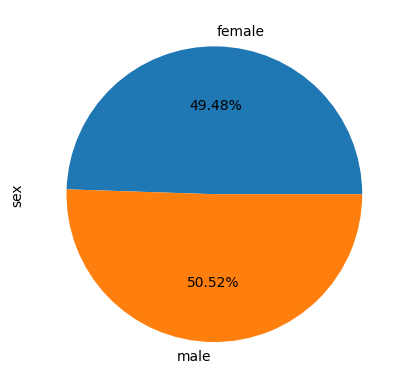

In [11]:
dataset_frame.groupby('sex').size().plot(kind='pie',ylabel='sex',
autopct='%.2f%%')

The code is grouping the data by the "sex" column and then using the "size" method to count the number of occurrences of each value (male and female). It then plots the results as a pie chart using the "plot" method, with the "autopct" parameter formatting the percentages to two decimal places. The resulting pie chart shows that 49.48% of the data is female and 50.52% is male.

>- plot Bar chart for a categorical variable (‘sex’) from data frame

<Axes: xlabel='sex'>

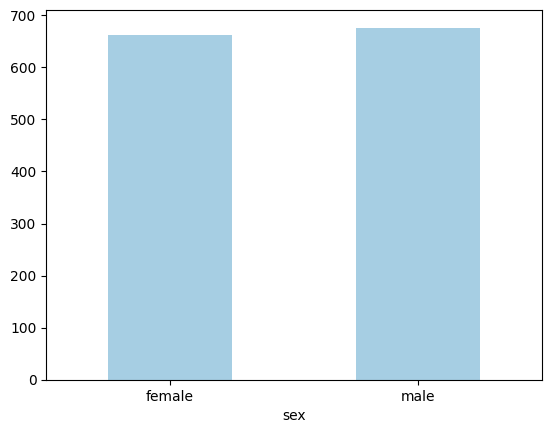

In [12]:
dataset_frame.groupby('sex').size().plot(kind='bar', rot=0,
colormap='Paired')

The code creates a bar plot where the x-axis represents the sex column with two categories, female and male, and the y-axis represents the count of each category. The rot=0 argument specifies that the x-axis labels should be horizontal, and the colormap='Paired' argument sets the color scheme for the bars.

# 3) For quantitative variables

>- describe one quantitative variable (‘age’) from data frame

In [13]:
dataset_frame['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

The dataset_frame['age'].describe() function call output provides descriptive statistics of the age column in the dataset_frame dataframe. The output shows the count, mean, standard deviation, minimum, maximum, and the first, second (median), and third quartiles of the data. Here's what each of these statistics means:

count: The number of non-missing values in the column.
mean: The arithmetic mean (average) of the values in the column.
std: The standard deviation of the values in the column, which measures the spread of the data around the mean.
min: The smallest value in the column.
25%: The first quartile, which is the value below which 25% of the data falls.
50%: The second quartile, which is the median of the data (the value that splits the data into two equal halves).
75%: The third quartile, which is the value below which 75% of the data falls.
max: The largest value in the column.

>- example plot a histogram from an data array with input bins from the lecture

Text(0.5, 1.0, 'Histogram of Ages')

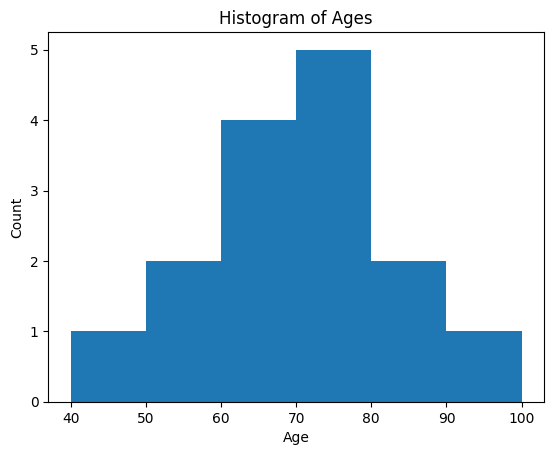

In [14]:
ages = [81, 48, 60, 51, 57, 85, 69, 75, 90, 72, 71, 79, 65, 63,
74]
bins = [40, 50, 60, 70, 80, 90, 100]
plt.hist(x=ages, bins=bins, histtype='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Ages')

The histogram shows the distribution of ages in the given data set. The x-axis represents the age range, which is divided into six bins of width 10, and the y-axis represents the frequency or count of ages falling within each bin. The histogram is skewed to the right, with most of the ages falling between 60 and 80. The highest frequency or count is in the bin of ages 70-80. The histogram gives a visual representation of the data distribution and can be used to identify any outliers or unusual patterns in the data

>- plot a histogram for a quantitative variable (‘age’) from data frame with 20 equal
bins

<Axes: >

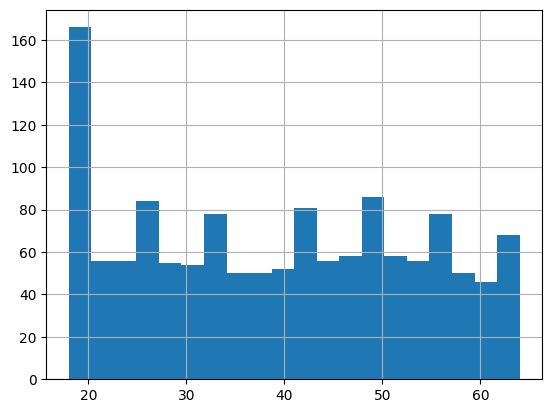

In [15]:
dataset_frame['age'].hist(bins=20)

This histogram shows the distribution of ages in the dataset. The x-axis shows the age ranges, and the y-axis shows the frequency of each age range. The histogram is divided into 20 bins, which represent the age ranges.

From the histogram, we can see that the most common age range is between 18 and 22 years old, and the distribution is skewed to the right, indicating that there are more people in the dataset that are younger than the average age. The histogram also shows a smaller peak around the age range of 45 to 50, indicating that there is a relatively high number of people in the dataset in that age range as well. Overall, the histogram provides a good visual representation of the distribution of ages in the dataset.

>- calculate mode, mean, median for a quantitative variable (‘age’) from data frame

In [17]:
dataset_frame['age'].mode()
dataset_frame['age'].mean()
dataset_frame['age'].median()

39.0

The code dataset_frame['age'].mode() returns the mode (most frequent value) of the 'age' column in the dataset.
The code dataset_frame['age'].mean() returns the mean (average) value of the 'age' column in the dataset.
The code dataset_frame['age'].median() returns the median (middle) value of the 'age' column in the dataset.
Therefore, the output 39.0 is the median age in the dataset.
As the mode, mean, and median of a dataset are the same value, it indicates that the data is symmetrically distributed. In this case, the ages in the dataset are distributed approximately symmetrically, with a peak around 39 years old, so the mode, mean, and median are all approximately 39.

>- calculate min, max, range for a quantitative variable (‘age’) from data frame
range

In [18]:
min_ = dataset_frame['age'].min()
max_ = dataset_frame['age'].max()
range_ = max_ - min_

>- Calculate quantiles, IQR, outliers for a quantitative variable (‘age’) from data frame

In [20]:
Q25 = dataset_frame['age'].quantile(0.25)
Q75 = dataset_frame['age'].quantile(0.75)
IQR = Q75 - Q25

age_outliers = dataset_frame[(dataset_frame.age < Q25 - 1.5*IQR) |
(dataset_frame.age > Q75 + 1.5*IQR)]['age']

>- calculate standard deviation of a quantitative variable (‘age’) from data frame

In [21]:
age_std = dataset_frame['age'].std()

>- box plot for a quantitative variable (‘age’) from data frame

Text(0, 0.5, 'Age')

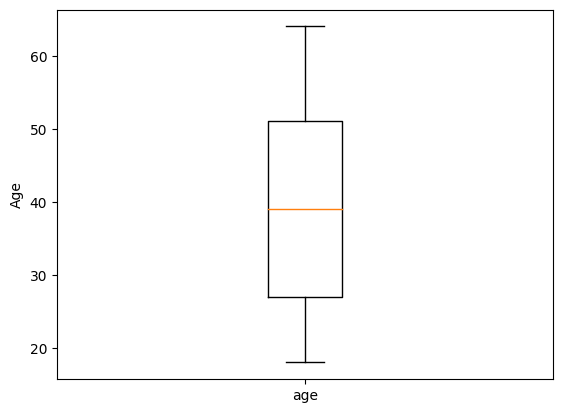

In [22]:
plt.boxplot(x=dataset_frame['age'], labels=['age'])
plt.ylabel('Age')

The box plot shows the distribution of the age variable in the dataset. The box represents the interquartile range (IQR) which contains 50% of the data, with the median represented by the line inside the box. The whiskers extend from the box to the minimum and maximum values within 1.5 times the IQR. Any points outside of this range are considered outliers and are represented as individual points.

In this specific case, the box plot shows that the majority of the ages are between approximately 27 and 51, with no outliers on the upper end of the distribution.